In [30]:
%load_ext autoreload
%autoreload 2

In [22]:
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. 修正贝叶斯图片（不同次品率下）

In [31]:
from bayes import plot

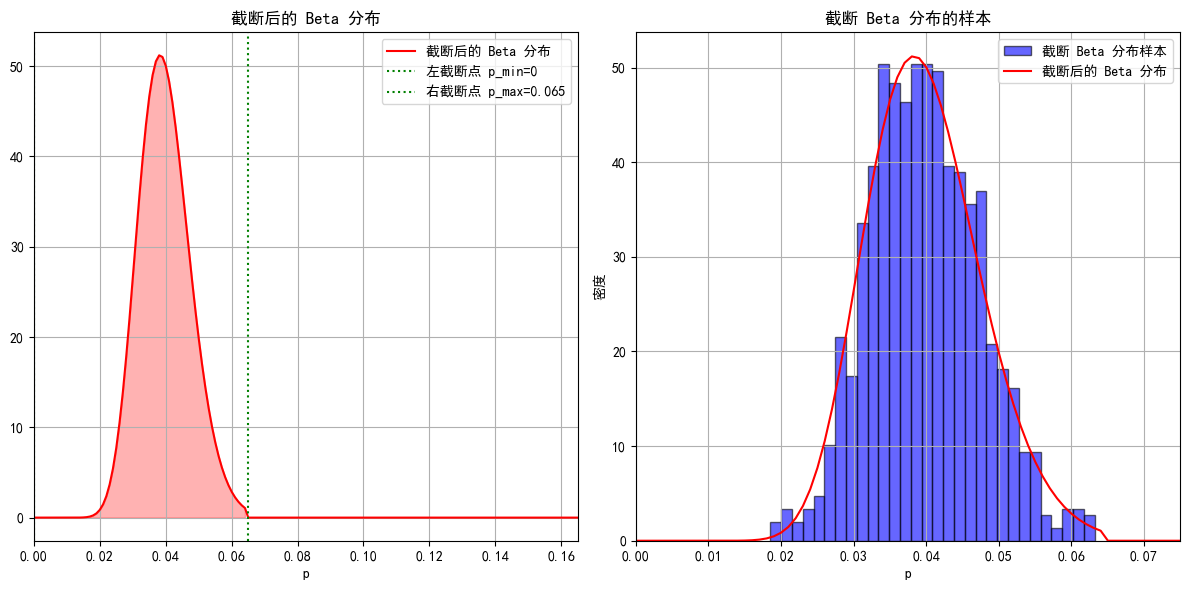

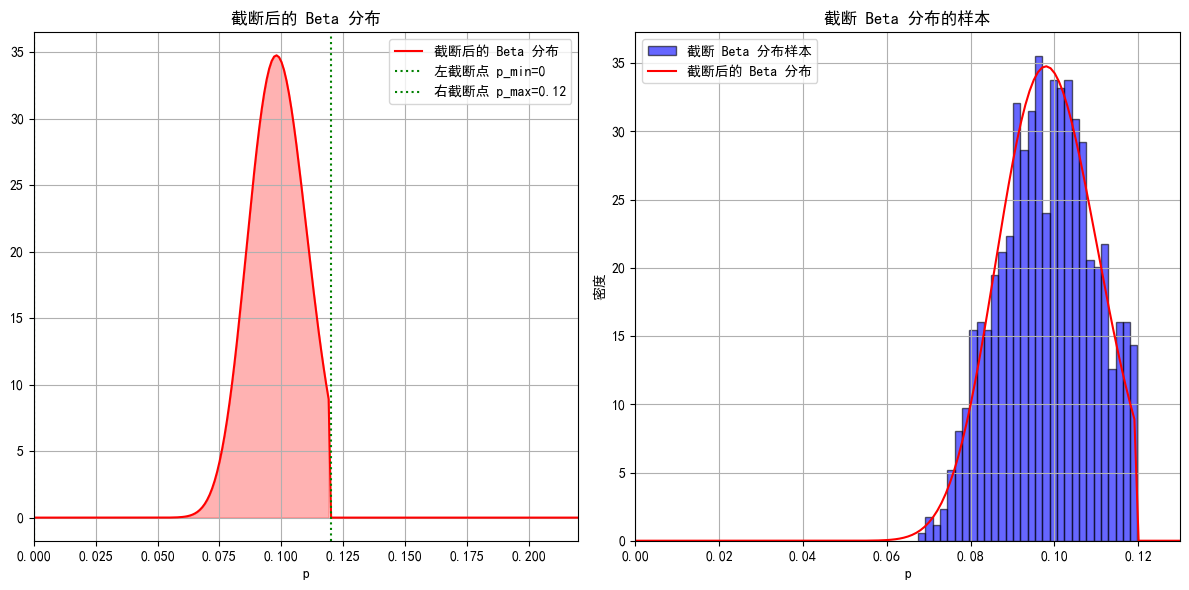

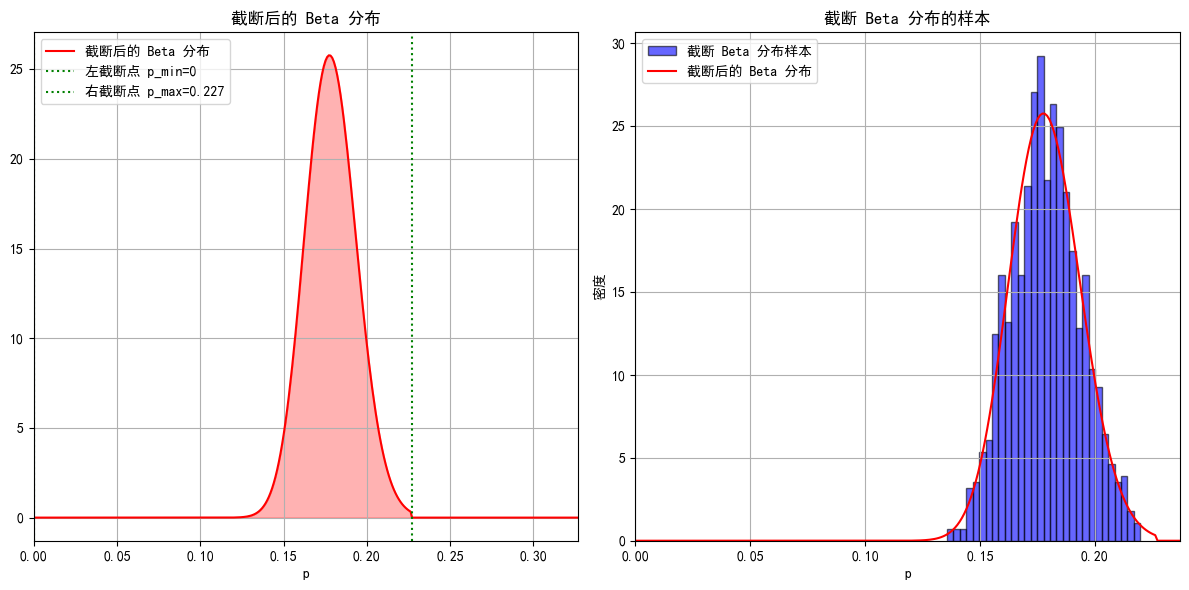

In [32]:
for p in [0.05,0.1,0.2]:
    plot(1-p,0.5)

# 2. 重做Q2

In [15]:
from re_Q2 import calculate as calculate2

way_keys = ["A", "B", "C", "D", "E", "F"]
price_keys = ["lj1","j_lj1","lj2","j_lj2","cp","j_cp","sale","diaohuan","chaijie"]

In [16]:
condition_prob=[
    [0.1,0.1,0.1],
    [0.2,0.2,0.2],
    [0.1,0.1,0.1],
    [0.2,0.2,0.2],
    [0.1,0.2,0.1],
    [0.05,0.05,0.05]
]
condition_p=[
    [4,2,18,3,6,3,56,6,5],
    [4,2,18,3,6,3,56,6,5],
    [4,2,18,3,6,3,56,30,5],
    [4,1,18,1,6,2,56,30,5],
    [4,8,18,1,6,2,56,10,5],
    [4,2,18,3,6,3,56,10,40]
]

In [17]:
way_st=set()
st=[0,1]
for a in st:
    for b in st:
        for c in st:
            for d in st:
                for e in st:
                    for f in st:
                        if e or f:
                            d=1
                        if a:
                            e=0
                        if b:
                            f=0
                        way_st.add((a,b,c,d,e,f))
way_st=list(way_st)                        
# print(way_st)

In [18]:
ways=[{key:value for key,value in zip(way_keys,st)} for st in way_st]
# ways

In [19]:
# # 情况


# for cond in range(6):
#     re = []
#     N = 1000
#     p = condition_prob[cond]
#     p0 = p[0]
#     p1 = p[1]
#     p2 = p[2]
#     price = {key: value for key, value in zip(price_keys, condition_p[cond])}
#     for way in tqdm(ways):

#         result = calculate2(N, way, p0, p1, p2, price, sigma=0.5, n=1000)
#         tmp = way.copy()
#         tmp["mean"] = np.round(result.mean(), 2)
#         tmp["std"] = np.round(result.std(), 3)
#         tmp["result"] = np.round(result, 2)
#         re.append(tmp)

#     df = pd.DataFrame(re)
#     df = df.sort_values(by="mean", ascending=False)
#     df.reset_index(drop=True, inplace=True)
#     df.to_csv(f"reQ2_re/Q2_{cond+1}.csv", index=False)
# # df

100%|██████████| 26/26 [06:36<00:00, 15.25s/it]


In [15]:
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"



def plot_histogram_with_pdf(csv_file):

    df = pd.read_csv(csv_file)

    data_str = df.iloc[0, -1]
    data_str = data_str.replace("[", "").replace("]", "").replace("\n", " ")

    data_list = list(map(float, data_str.split()))

    title = (
        str(df.iloc[0, -3:-1].to_dict())
        .replace("{", "")
        .replace("}", "")
        .replace("'", "")
        .replace("mean", "平均值")
        .replace("std", "标准差")
        .replace(" ","")
    )

    text = (
        str(df.iloc[0, :-3].to_dict())
        .replace("{", "")
        .replace("}", "")
        .replace("'", "")
        .replace("D", "\nD")
        .replace(" ","")
    )

    sns.histplot(
        data_list,
        kde=False,
        stat="density",
        color="blue",
        alpha=0.6,
        label=f"策略\n{text}",
    )

    sns.kdeplot(data_list, color="red", label="核密度估计")

    plt.ylabel("频率")

    plt.title(title)

    plt.legend()

    plt.tight_layout()

    plt.show()

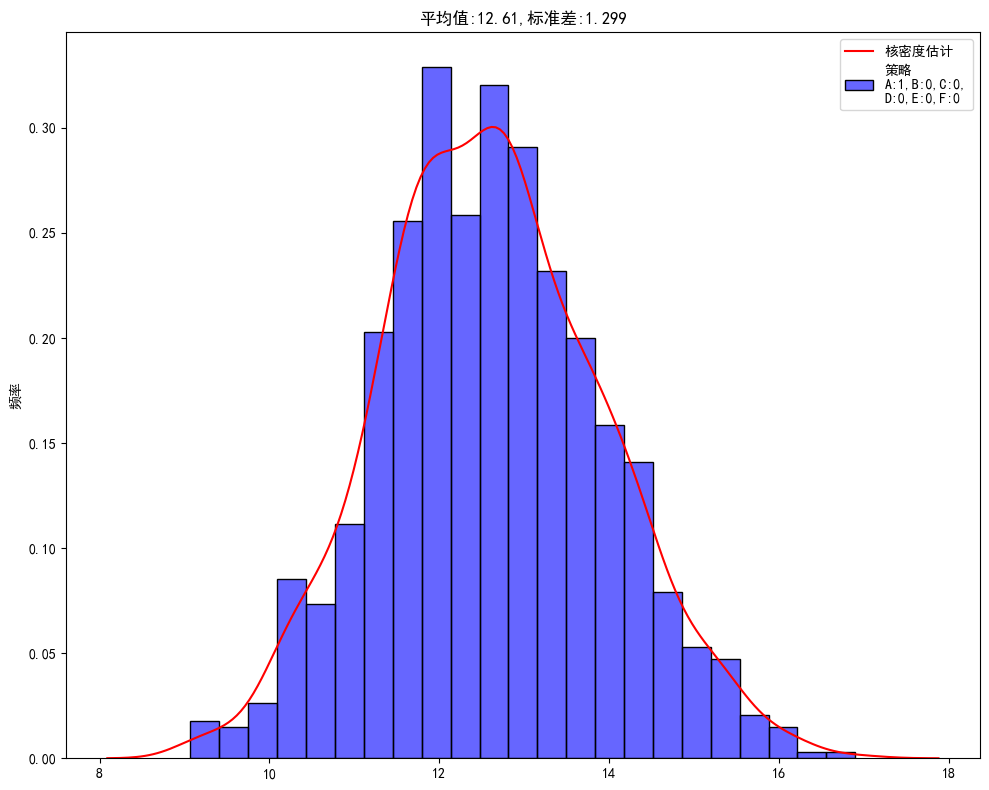

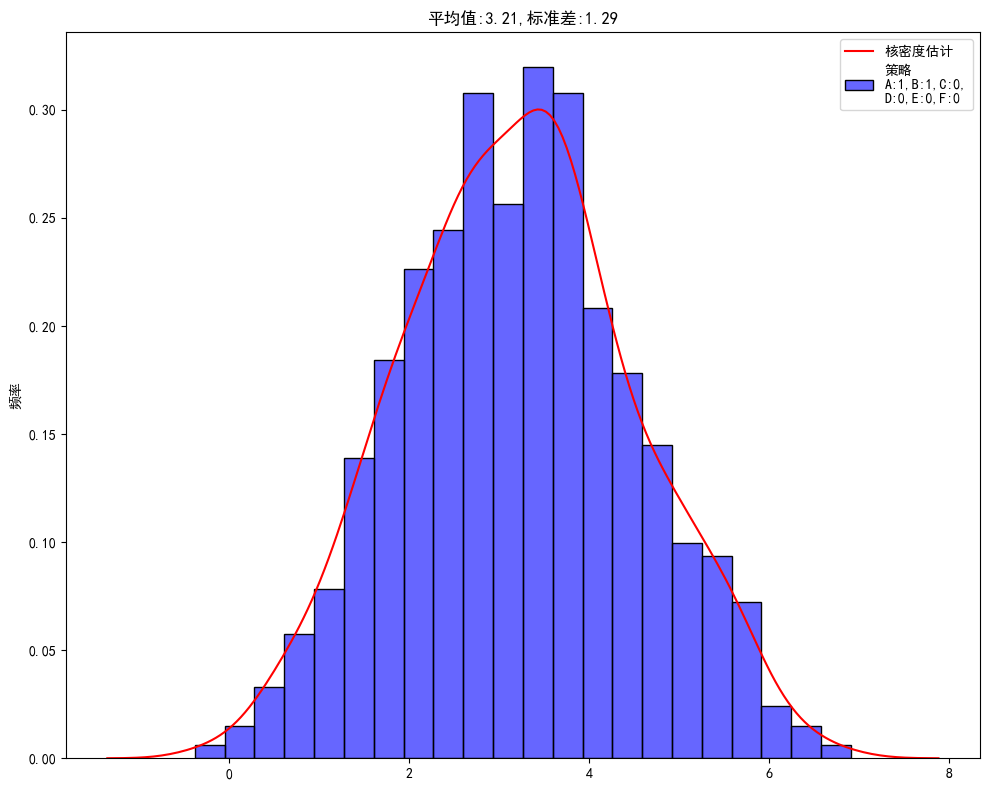

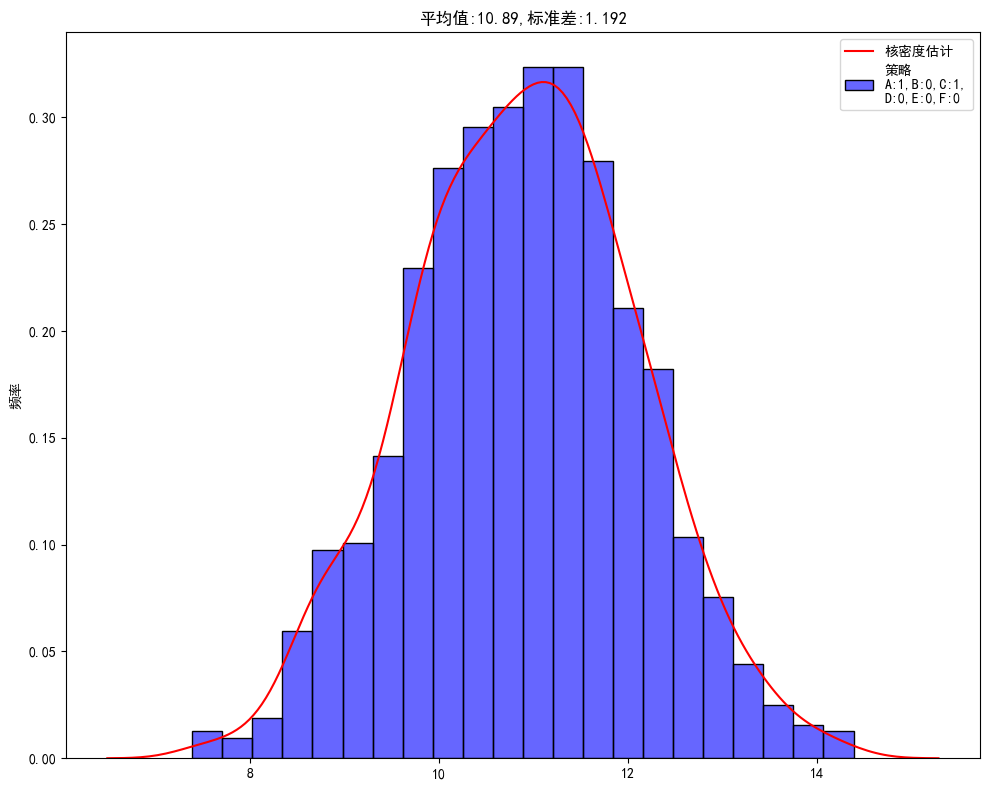

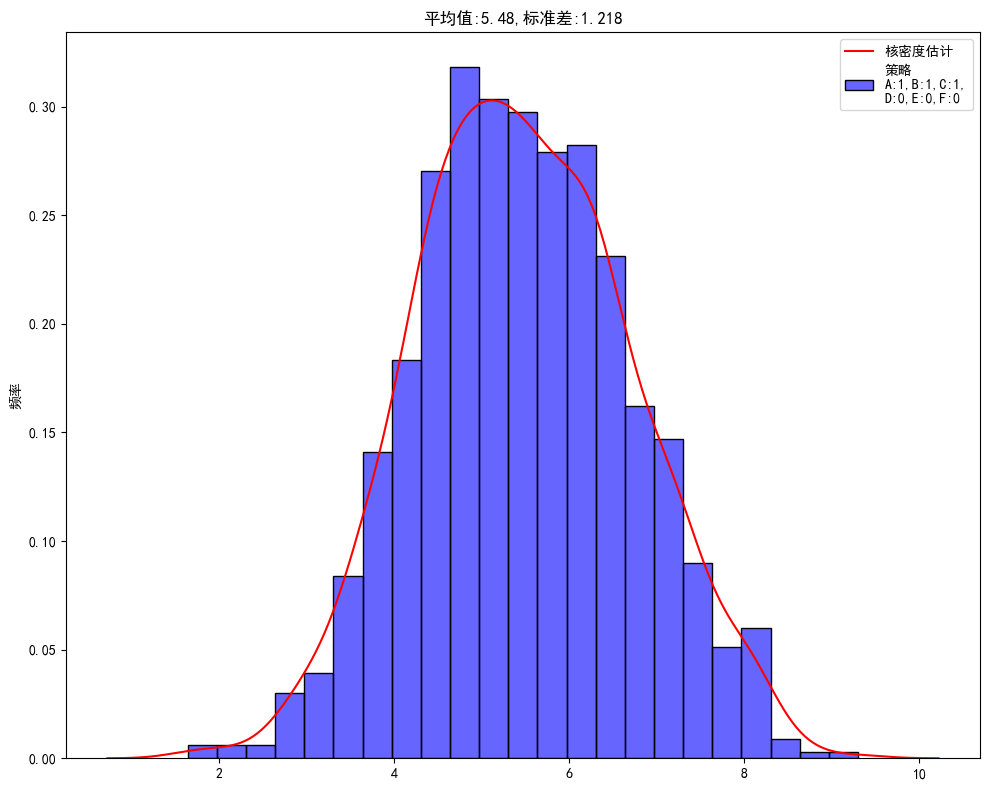

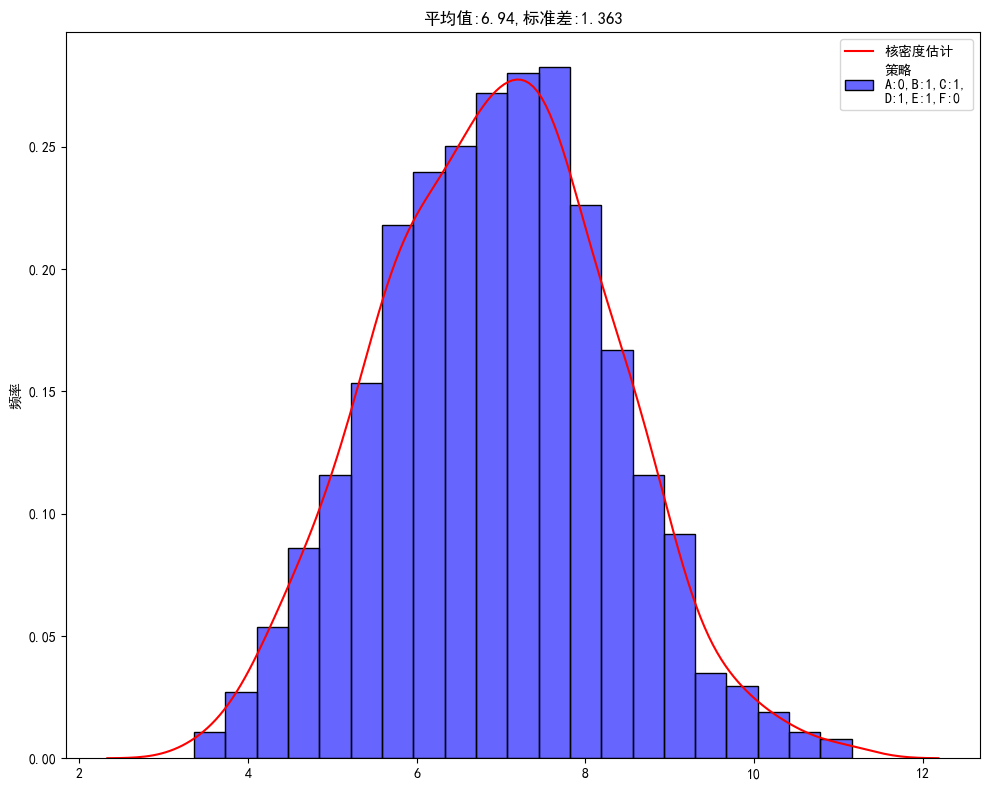

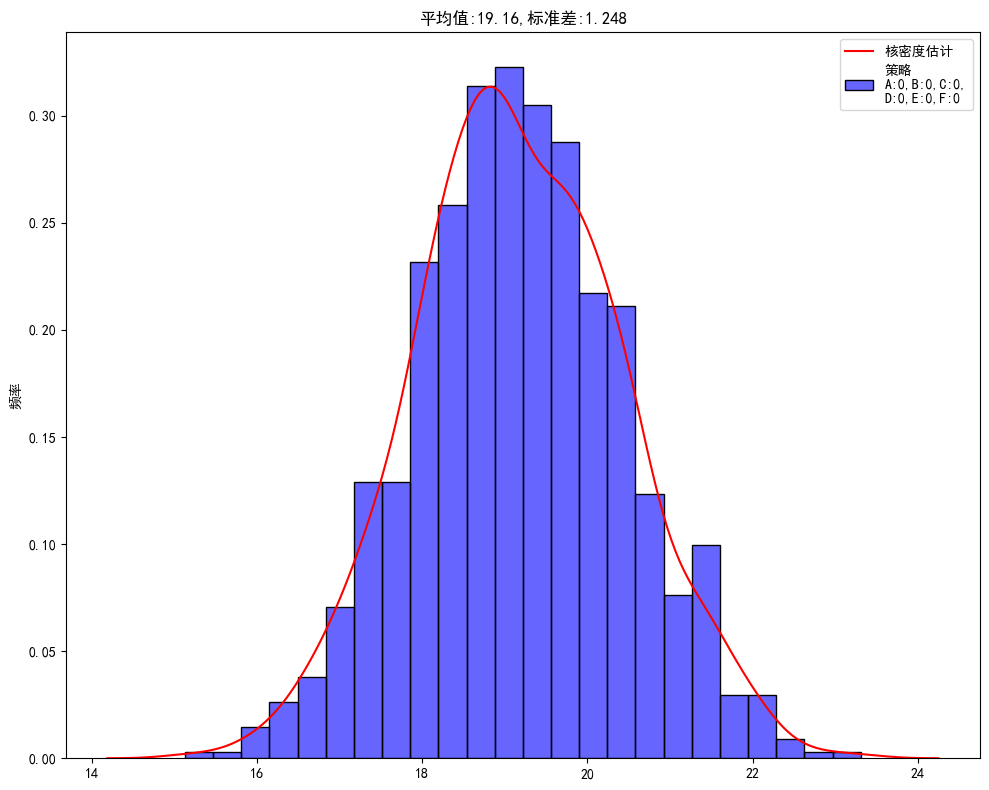

In [16]:
# 使用函数绘制图形
for cond in range(6):
    csv_file = f"reQ2_re/Q2_{cond+1}.csv"
    plot_histogram_with_pdf(csv_file) 

# 3. 重做Q3

In [24]:
from re_Q3 import calculate as calculate3

In [25]:
price = {
        "lj1": 2,
        "j_lj1": 1,
        "lj2": 8,
        "j_lj2": 1,
        "lj3": 12,
        "j_lj3": 1,
        "lj4": 2,
        "j_lj4": 1,
        "lj5": 8,
        "j_lj5": 1,
        "lj6": 12,
        "j_lj6": 2,
        "lj7": 8,
        "j_lj7": 1,
        "lj8": 12,
        "j_lj8": 2,
        "bc": 8,
        "j_bc": 4,
        "c_bc": 6,
        "cp": 8,
        "j_cp": 6,
        "c_cp": 10,
        "sale": 200,
        "diao": 40,
    }
check = ["bc1", "bc2", "bc3", "cp", "chai", "re_bc1", "re_bc2", "re_bc3"]

In [26]:
way_st = set()
st = [0, 1]
for bc1 in st:
    for bc2 in st:
        for bc3 in st:
            for cp in st:
                for chai in st:
                    for re_bc1 in st:
                        for re_bc2 in st:
                            for re_bc3 in st:
                                for re_cp in st:
                                    for re_chai in st:
                                        if re_bc1 and not chai:
                                            re_bc1 = 0
                                        if re_bc2 and not chai:
                                            re_bc2 = 0
                                        if re_bc3 and not chai:
                                            re_bc3 = 0
                                        if bc1:
                                            re_bc1 = 0
                                        if bc2:
                                            re_bc2 = 0

                                        if bc3:
                                            re_bc3 = 0
                                        way_st.add(
                                            (
                                                bc1,
                                                bc2,
                                                bc3,
                                                cp,
                                                chai,
                                                re_bc1,
                                                re_bc2,
                                                re_bc3,
                                            )
                                        )
way_st = list(way_st)
print(len(way_st))

70


In [27]:
ways=[{key:value for key,value in zip(check,st)} for st in way_st]

In [29]:
# re = []
# for way in tqdm(ways):
#     p = 0.1
#     N = 10000
#     iter = 1000
#     pr = False
#     sigma = 0.5
#     result = calculate3(way, price, N, iter, p, sigma, pr)
#     tmp = way.copy()
#     tmp["mean"] = np.round(result.mean(), 2)
#     tmp["std"] = np.round(result.std(), 3)
#     tmp["result"] = np.round(result, 2)
#     re.append(tmp)

#     df = pd.DataFrame(re)
#     df = df.sort_values(by="mean", ascending=False)
#     df.reset_index(drop=True, inplace=True)
#     df.to_csv(f"reQ3_re/Q3result.csv", index=False)
# df

100%|██████████| 70/70 [33:25<00:00, 28.65s/it]


,bc1,bc2,bc3,cp,chai,re_bc1,re_bc2,re_bc3,mean,std,result
0,1,1,1,0,0,0,0,0,14.98,3.350,"[13.22, 13.63, 18.65, 16.23, 14.17, 17.19, 15...."
1,1,1,1,1,0,0,0,0,13.32,2.977,"[14.09, 10.54, 12.22, 14.14, 10.69, 12.65, 12...."
2,1,1,1,0,1,0,0,0,-5.28,3.166,"[-6.35, -9.11, -6.46, -5.45, -9.25, -3.36, -4...."
3,0,1,1,1,0,0,0,0,-6.64,4.222,"[-7.12, -3.37, -2.27, -8.63, -7.44, -13.07, -9..."
4,1,0,1,1,0,0,0,0,-6.94,4.027,"[2.69, -8.78, -10.24, -2.31, -5.92, -1.33, -13..."
...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,1,1,0,0,-86.29,8.812,"[-80.42, -81.65, -84.88, -60.83, -98.23, -73.4..."
66,0,0,0,0,1,1,0,1,-86.85,8.276,"[-90.53, -64.71, -94.14, -74.2, -89.93, -97.2,..."
67,0,0,0,0,1,0,1,1,-87.01,8.548,"[-94.97, -97.47, -74.47, -79.86, -67.35, -90.8..."
68,0,0,0,0,1,1,1,0,-87.24,8.394,"[-95.08, -80.61, -102.19, -100.79, -86.51, -87..."


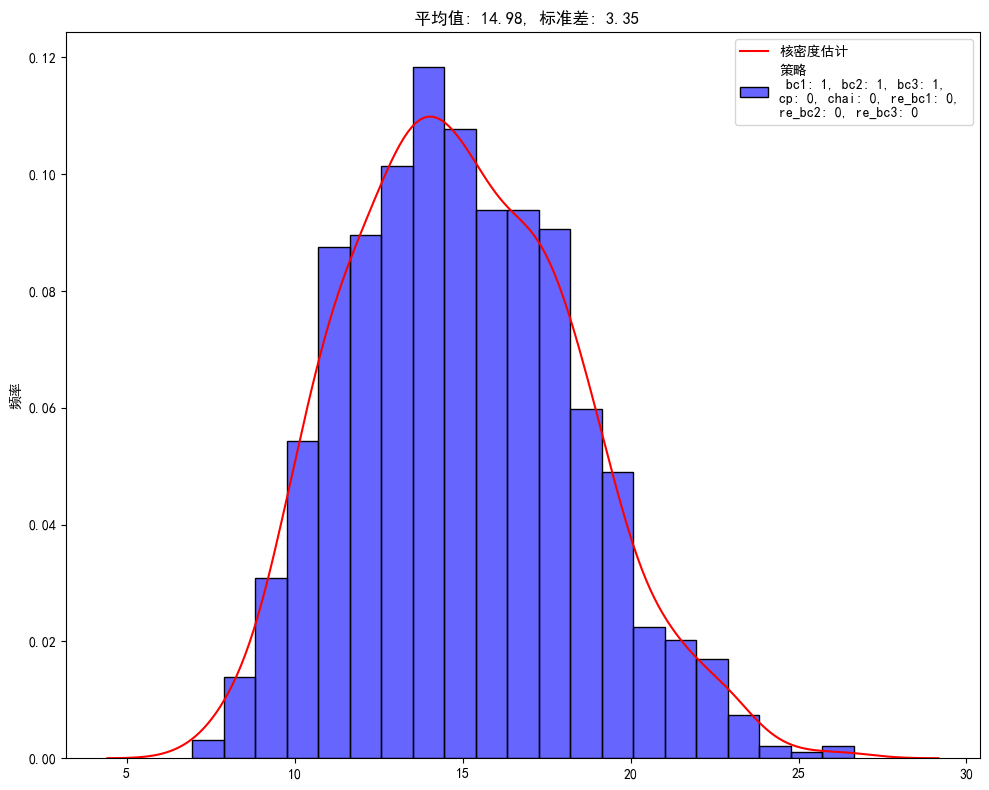

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def plot_histogram_with_pdf(csv_file):
    df = pd.read_csv(csv_file)
    data_str = df.iloc[0, -1]
    data_str = data_str.replace("[", "").replace("]", "").replace("\n", " ")
    data_list = list(map(float, data_str.split()))

    title = (
        str(df.iloc[0, -3:-1].to_dict())
        .replace("{", " ")
        .replace("}", "")
        .replace("'", "")
        .replace("mean", "平均值")
        .replace("std", "标准差")
    )
    text = (
        str(df.iloc[0, :-3].to_dict())
        .replace("{", " ")
        .replace("}", "")
        .replace("'", "")
        .replace("cp", "\ncp")
        .replace("re_bc2", "\nre_bc2")
    )

    sns.histplot(
        data_list,
        kde=False,
        stat="density",
        color="blue",
        alpha=0.6,
        label=f"策略\n{text}",
    )
    sns.kdeplot(data_list, color="red", label="核密度估计")
    plt.ylabel("频率")

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_histogram_with_pdf(f"reQ3_re/Q3result.csv")